# House Price Prediction

In [1]:
#  Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [3]:
#Reading the data

housing = pd.read_csv(r"C:\Users\91743\train_house_data.csv")
housing.head()

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,house_9442,Super built-up Area,Ready To Move,Abbigere,2 BHK,SLtias,795,2.0,1.0,32.54
1,house_2578,Super built-up Area,Ready To Move,Mallasandra,2 BHK,NaN,1340,2.0,2.0,61.00
2,house_8279,Super built-up Area,Ready To Move,Sector 2 HSR Layout,3 BHK,NDpalSe,1512,3.0,NaN,80.00
3,house_1584,Super built-up Area,19-Dec,Hoodi,3 BHK,Caycend,1512,3.0,2.0,75.77
4,house_4516,Plot Area,Ready To Move,RMV 2nd Stage,3 Bedroom,NaN,4470,3.0,NaN,700.00


# Univriate Analysis

In [4]:
#Checking the features in the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   society       6253 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10596 non-null  float64
 8   balcony       10189 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), object(7)
memory usage: 832.6+ KB


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   society       6253 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10596 non-null  float64
 8   balcony       10189 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), object(7)
memory usage: 832.6+ KB


Text(0.5, 0, 'size')

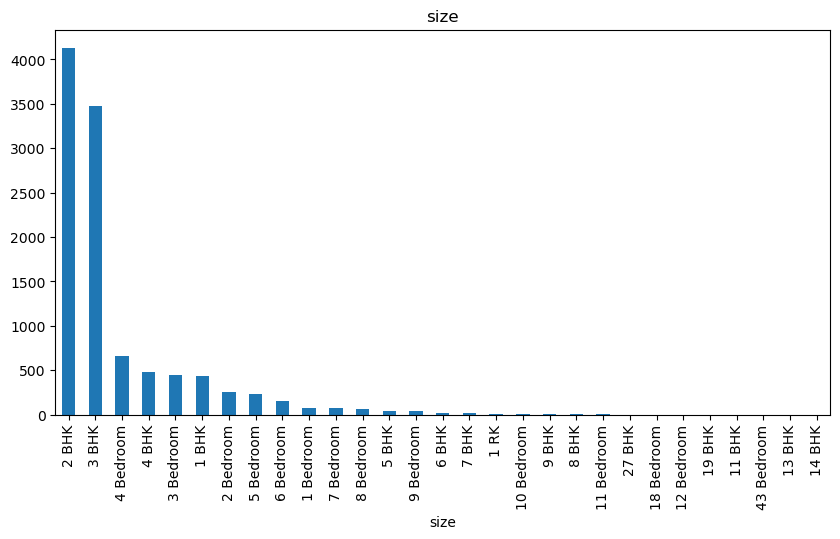

In [6]:
housing['size'].value_counts().plot(kind='bar')
plt.title("size")
plt.xlabel('size')

Text(0.5, 1.0, 'price vs square feet')

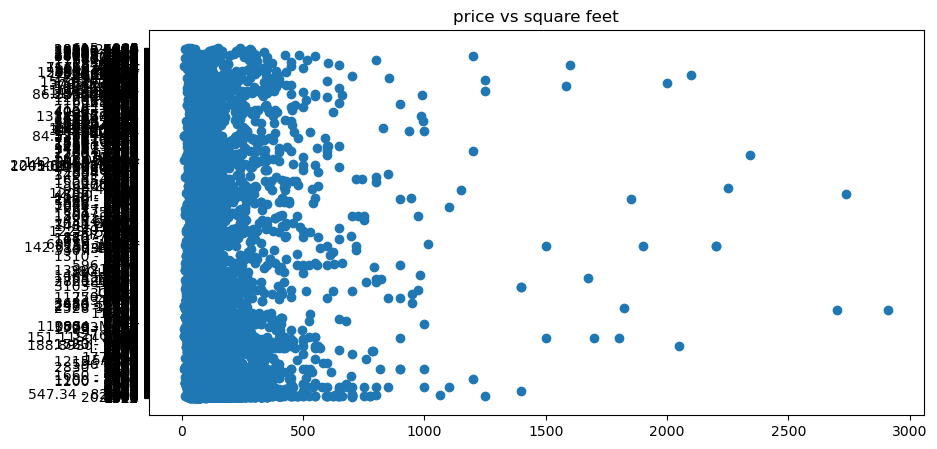

In [7]:
plt.scatter(housing.price,housing.total_sqft)
plt.title("price vs square feet") 

<AxesSubplot:xlabel='area_type', ylabel='count'>

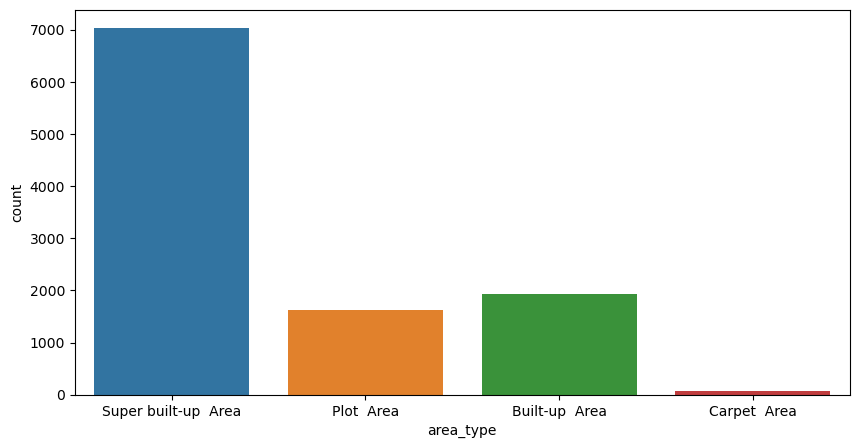

In [8]:
sns.countplot(x="area_type", data = housing)


In [9]:
housing["availability"].value_counts()

Ready To Move           8451
18-Dec                   256
18-May                   246
18-Apr                   211
18-Aug                   153
19-Dec                   149
18-Jul                   115
18-Mar                   105
20-Dec                    83
18-Jun                    77
19-Mar                    72
21-Dec                    72
18-Feb                    43
18-Jan                    39
19-Jun                    37
18-Oct                    32
18-Nov                    32
19-Jan                    31
18-Sep                    30
19-Jul                    28
17-Dec                    22
20-Jan                    19
17-Oct                    18
22-Jun                    17
Immediate Possession      16
19-Sep                    16
21-Jun                    15
19-Aug                    15
20-Aug                    14
19-Oct                    13
19-Apr                    12
21-May                    11
21-Mar                    10
17-Jul                    10
20-Jun        

In [10]:
for column in housing.columns:
    print(housing[column].value_counts())
    print("*"*20)

house_9442     1
house_9414     1
house_9927     1
house_1768     1
house_4126     1
              ..
house_1049     1
house_11836    1
house_3937     1
house_10503    1
house_10700    1
Name: house_id, Length: 10656, dtype: int64
********************
Super built-up  Area    7030
Built-up  Area          1926
Plot  Area              1628
Carpet  Area              72
Name: area_type, dtype: int64
********************
Ready To Move           8451
18-Dec                   256
18-May                   246
18-Apr                   211
18-Aug                   153
19-Dec                   149
18-Jul                   115
18-Mar                   105
20-Dec                    83
18-Jun                    77
19-Mar                    72
21-Dec                    72
18-Feb                    43
18-Jan                    39
19-Jun                    37
18-Oct                    32
18-Nov                    32
19-Jan                    31
18-Sep                    30
19-Jul                    28
1

In [11]:
housing["location"].value_counts()

Whitefield              445
Sarjapur  Road          318
Electronic City         246
Kanakpura Road          212
Thanisandra             184
                       ... 
Sahyadri Layout           1
Kothnoor Dinne            1
JP Nagar 7th Phase,       1
Sampigehalli              1
Kalasipalya               1
Name: location, Length: 1196, dtype: int64

In [12]:
housing["size"].value_counts()

2 BHK         4130
3 BHK         3476
4 Bedroom      665
4 BHK          480
3 Bedroom      441
1 BHK          431
2 Bedroom      259
5 Bedroom      236
6 Bedroom      154
1 Bedroom       76
7 Bedroom       70
8 Bedroom       63
5 BHK           46
9 Bedroom       35
6 BHK           23
7 BHK           15
1 RK            11
10 Bedroom      10
9 BHK            5
8 BHK            4
11 Bedroom       2
27 BHK           1
18 Bedroom       1
12 Bedroom       1
19 BHK           1
11 BHK           1
43 Bedroom       1
13 BHK           1
14 BHK           1
Name: size, dtype: int64

In [13]:
housing["society"].value_counts()

GrrvaGr    63
PrarePa    57
Prtates    52
Sryalan    45
GMown E    45
           ..
Reeroce     1
Bhacy L     1
Saconp      1
Ajomaa      1
Nentsan     1
Name: society, Length: 2372, dtype: int64

In [14]:
housing["total_sqft"].value_counts()

1200         684
1100         175
1500         164
2400         160
600          145
            ... 
492            1
1592           1
2282           1
1987           1
615 - 985      1
Name: total_sqft, Length: 1934, dtype: int64

C:\Users\91743\AppData\Local\Temp\ipykernel_13856\2839868820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["bath"], hist=True, kde=False,


<AxesSubplot:xlabel='bath'>

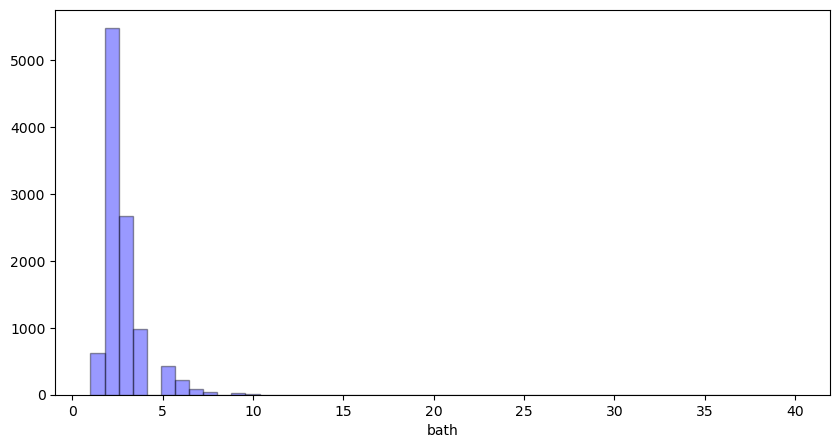

In [15]:
sns.distplot(housing["bath"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [16]:
housing["balcony"].value_counts()

2.0    4147
1.0    3866
3.0    1345
0.0     831
Name: balcony, dtype: int64

Handling Missing Values

In [17]:
housing.isnull().sum()

house_id           0
area_type          0
availability       0
location           0
size              16
society         4403
total_sqft         0
bath              60
balcony          467
price              0
dtype: int64

In [18]:
housing_clean = housing.copy()

In [19]:
housing_clean[pd.isnull(housing_clean["size"])]

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price
119,house_2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
1530,house_6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
2742,house_11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
3018,house_579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
3042,house_11019,Plot Area,Immediate Possession,Yelahanka,NaN,Saaveha,1200 - 1800,NaN,NaN,12.750
3336,house_7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000
4124,house_2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
4531,house_8565,Plot Area,Immediate Possession,Carmelaram,NaN,Ocezes,2000,NaN,NaN,120.000
4858,house_8306,Plot Area,Immediate Possession,Anekal,NaN,Vaensnd,1453,NaN,NaN,16.500
5214,house_5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115


In [20]:
# # Dropping samples with 3 or more missing records
# housing_clean.dropna(axis=0, thresh = 7, inplace = True)

In [21]:
# housing_clean.isnull().sum()

In [22]:
housing["size"].value_counts()

2 BHK         4130
3 BHK         3476
4 Bedroom      665
4 BHK          480
3 Bedroom      441
1 BHK          431
2 Bedroom      259
5 Bedroom      236
6 Bedroom      154
1 Bedroom       76
7 Bedroom       70
8 Bedroom       63
5 BHK           46
9 Bedroom       35
6 BHK           23
7 BHK           15
1 RK            11
10 Bedroom      10
9 BHK            5
8 BHK            4
11 Bedroom       2
27 BHK           1
18 Bedroom       1
12 Bedroom       1
19 BHK           1
11 BHK           1
43 Bedroom       1
13 BHK           1
14 BHK           1
Name: size, dtype: int64

In [23]:
housing_clean['size']=housing_clean['size'].fillna('2 BHK')

In [24]:
housing_clean.isnull().sum()

house_id           0
area_type          0
availability       0
location           0
size               0
society         4403
total_sqft         0
bath              60
balcony          467
price              0
dtype: int64

In [25]:
housing_clean['bath'].value_counts()

2.0     5485
3.0     2671
4.0      990
1.0      621
5.0      430
6.0      213
7.0       84
8.0       47
9.0       32
10.0       9
11.0       3
12.0       3
13.0       2
27.0       1
18.0       1
16.0       1
40.0       1
14.0       1
15.0       1
Name: bath, dtype: int64

In [26]:
housing_clean['bath']=housing_clean['bath'].fillna(housing_clean['bath'].median())

In [27]:
housing_clean.isnull().sum()

house_id           0
area_type          0
availability       0
location           0
size               0
society         4403
total_sqft         0
bath               0
balcony          467
price              0
dtype: int64

In [28]:
housing_clean['bhk']=housing_clean['size'].str.split().str.get(0).astype(int)

In [29]:
housing_clean[housing_clean.bhk>20]

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
4719,house_1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27
7501,house_4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43


In [30]:
housing_clean.head()

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,house_9442,Super built-up Area,Ready To Move,Abbigere,2 BHK,SLtias,795,2.0,1.0,32.54,2
1,house_2578,Super built-up Area,Ready To Move,Mallasandra,2 BHK,NaN,1340,2.0,2.0,61.00,2
2,house_8279,Super built-up Area,Ready To Move,Sector 2 HSR Layout,3 BHK,NDpalSe,1512,3.0,NaN,80.00,3
3,house_1584,Super built-up Area,19-Dec,Hoodi,3 BHK,Caycend,1512,3.0,2.0,75.77,3
4,house_4516,Plot Area,Ready To Move,RMV 2nd Stage,3 Bedroom,NaN,4470,3.0,NaN,700.00,3


In [31]:
housing_clean['total_sqft']=pd.to_numeric(housing_clean.total_sqft,errors='coerce')

In [32]:

housing_clean['price_per_sqft']=housing_clean['price']*100000/housing_clean['total_sqft']


In [33]:
housing_clean['price_per_sqft']

0         4093.081761
1         4552.238806
2         5291.005291
3         5011.243386
4        15659.955257
             ...     
10651     8333.333333
10652     5750.000000
10653     3500.000000
10654    13750.000000
10655    10810.810811
Name: price_per_sqft, Length: 10656, dtype: float64

In [34]:
housing_clean.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10452.000000,10656.000000,10189.000000,10656.000000,10656.000000,1.045200e+04
mean,1559.521018,2.691348,1.589459,112.617980,2.806025,8.269461e+03
std,1288.194477,1.335079,0.818040,142.661727,1.301843,1.199081e+05
min,1.000000,1.000000,0.000000,8.440000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.272562e+03
50%,1280.000000,2.000000,2.000000,72.000000,3.000000,5.469106e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.346411e+03
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,1.200000e+07


In [35]:
housing_clean['location'].value_counts()

Whitefield              445
Sarjapur  Road          318
Electronic City         246
Kanakpura Road          212
Thanisandra             184
                       ... 
Sahyadri Layout           1
Kothnoor Dinne            1
JP Nagar 7th Phase,       1
Sampigehalli              1
Kalasipalya               1
Name: location, Length: 1196, dtype: int64

In [36]:
housing_clean['location']=housing_clean['location'].apply(lambda x: x.strip())
location_count=housing_clean['location'].value_counts()

In [37]:
location_count

Whitefield           445
Sarjapur  Road       318
Electronic City      248
Kanakpura Road       212
Thanisandra          186
                    ... 
Richmond Road          1
Himagiri Meadows       1
Veerabhadra Nagar      1
Gandhi Nagar           1
Kalasipalya            1
Name: location, Length: 1186, dtype: int64

In [38]:
location_countlessthan10=location_count[location_count<=10]
location_countlessthan10

AECS Layout           10
Kodigehaali           10
Shampura              10
Pattandur Agrahara    10
Dairy Circle          10
                      ..
Richmond Road          1
Himagiri Meadows       1
Veerabhadra Nagar      1
Gandhi Nagar           1
Kalasipalya            1
Name: location, Length: 980, dtype: int64

In [39]:
housing_clean['location']=housing_clean['location'].apply(lambda x:'other' if x in location_countlessthan10 else x)

In [40]:
housing_clean['location'].value_counts()

other                          2613
Whitefield                      445
Sarjapur  Road                  318
Electronic City                 248
Kanakpura Road                  212
Thanisandra                     186
Yelahanka                       173
Marathahalli                    149
Hebbal                          149
Uttarahalli                     146
Raja Rajeshwari Nagar           137
Bannerghatta Road               118
7th Phase JP Nagar              118
Hennur Road                     118
Haralur Road                    105
Electronic City Phase II        101
Rajaji Nagar                     85
Bellandur                        79
Electronics City Phase 1         75
Chandapura                       75
Begur Road                       71
KR Puram                         70
Yeshwanthpur                     68
Sarjapur                         67
Kasavanhalli                     65
Hoodi                            65
Hormavu                          64
Harlur                      

In [41]:
housing_clean.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10452.000000,10656.000000,10189.000000,10656.000000,10656.000000,1.045200e+04
mean,1559.521018,2.691348,1.589459,112.617980,2.806025,8.269461e+03
std,1288.194477,1.335079,0.818040,142.661727,1.301843,1.199081e+05
min,1.000000,1.000000,0.000000,8.440000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.272562e+03
50%,1280.000000,2.000000,2.000000,72.000000,3.000000,5.469106e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.346411e+03
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,1.200000e+07


In [42]:
housing_clean=housing_clean[((housing_clean['total_sqft']/housing_clean['bhk'])>=300)]
housing_clean.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9861.000000,9861.000000,9508.000000,9861.000000,9861.000000,9861.000000
mean,1594.178955,2.563330,1.614009,111.555817,2.653889,6329.330768
std,1313.093447,1.046277,0.793858,146.168279,0.954955,3923.203977
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1120.000000,2.000000,1.000000,49.300000,2.000000,4211.469534
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5317.725753
75%,1703.000000,3.000000,2.000000,116.000000,3.000000,6944.444444
max,52272.000000,14.000000,3.000000,2912.000000,13.000000,76923.076923


In [43]:
housing_clean.shape

(9861, 12)

In [44]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
housing_clean=remove_outliers_sqft(housing_clean)
housing_clean.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,8051.000000,8051.000000,7816.000000,8051.000000,8051.000000,8051.000000
mean,1494.469727,2.467023,1.615148,89.179575,2.569370,5607.090169
std,866.095637,0.940728,0.782924,80.336836,0.867638,2112.072263
min,300.000000,1.000000,0.000000,10.000000,1.000000,1975.238095
25%,1110.000000,2.000000,1.000000,48.950000,2.000000,4237.288136
50%,1285.000000,2.000000,2.000000,67.000000,2.000000,5181.818182
75%,1645.000000,3.000000,2.000000,100.000000,3.000000,6405.067359
max,30400.000000,13.000000,3.000000,2200.000000,13.000000,21875.000000


In [45]:
housing_clean.drop(columns=['size'],inplace=True)

In [46]:
def bhk_outliers_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
housing_clean=bhk_outliers_remover(housing_clean)

In [47]:
housing_clean.shape

(5656, 11)

In [48]:
housing_clean.drop(columns=['price_per_sqft'],inplace=True)

In [49]:
housing_clean.head()

,house_id,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,house_10972,Super built-up Area,20-May,1st Block Jayanagar,NaN,2450.0,4.0,2.0,368.0,4
1,house_210,Super built-up Area,20-May,1st Block Jayanagar,NaN,2850.0,4.0,1.0,428.0,4
2,house_7383,Super built-up Area,20-May,1st Block Jayanagar,NaN,2750.0,4.0,0.0,413.0,4
3,house_7358,Super built-up Area,18-Jun,1st Block Jayanagar,NaN,1235.0,2.0,2.0,148.0,2
4,house_7138,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3


In [50]:
housing_clean.drop(columns=['society','house_id',],inplace=True)

In [54]:
housing_clean.isnull().sum()

area_type         0
availability      0
location          0
total_sqft        0
bath              0
balcony         167
price             0
bhk               0
dtype: int64

In [51]:
housing_clean.shape

(5656, 8)

In [52]:
housing_clean.to_csv("Cleaned_data_new.csv")


In [53]:
housing_clean.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
1,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
2,Super built-up Area,20-May,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
3,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
4,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


In [55]:
price = housing_clean["price"]
housing_clean.drop(["price"], axis = 1, inplace = True)

In [57]:
housing_clean = housing_clean[["total_sqft", "bhk", "bath", "availability", "area_type", "location"]]

Handling Categorical Features

In [80]:
le1 = LabelEncoder()
housing_availability = le1.fit_transform(housing_clean.iloc[:,3])

In [81]:
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(housing_clean.iloc[:,4])

In [82]:
le3 = LabelEncoder()
housing_location = le3.fit_transform(housing_clean.iloc[:,5])

In [83]:
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)
print(type(housing_availability))

<class 'pandas.core.frame.DataFrame'>


In [84]:
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

In [85]:
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

Preparing data for Model

In [86]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)

In [87]:
housing_num_features = housing_clean.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)

In [88]:
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

In [89]:
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)

In [90]:
housing_for_model

,total_sqft,bhk,bath,15-Dec,15-Jun,15-Nov,15-Oct,16-Dec,16-Mar,16-Sep,17-Apr,17-Aug,17-Dec,17-Jan,17-Jul,17-Jun,17-Mar,17-May,17-Nov,17-Oct,17-Sep,18-Apr,18-Aug,18-Dec,18-Feb,18-Jan,18-Jul,18-Jun,18-Mar,18-May,18-Nov,18-Oct,18-Sep,19-Apr,19-Aug,19-Dec,19-Feb,19-Jan,19-Jul,19-Jun,19-Mar,19-May,19-Nov,19-Oct,19-Sep,20-Apr,20-Aug,20-Dec,20-Jan,20-Jun,20-Mar,20-May,20-Nov,20-Oct,20-Sep,21-Dec,21-Feb,21-Jan,21-Jul,21-Jun,21-Mar,21-May,21-Oct,21-Sep,22-Dec,22-Jan,22-Mar,22-May,22-Nov,Immediate Possession,Built-up Area,Carpet Area,Plot Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage VI,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Cooke Town,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddakallasandra,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Giri Nagar,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagavara,Nagavarapalya,Narayanapura,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Seegehalli,Shivaji Nagar,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.147163,1.654567,1.577612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [91]:
X, y = housing_for_model.values, price.values
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, price, test_size = 0.2, random_state = 42)

# Comparing Models

In [92]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [100]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

C:\Users\91743\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


-7.87528945795333e+23

In [94]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.8614101245167078

In [95]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.8078090687744763

In [96]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8485982697275074

In [97]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
ab_reg.score(X_test, y_test)

0.5729303965936589

In [98]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.5838205566912276

In [99]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.888678989194569

In [102]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)


C:\Users\91743\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\91743\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,-8.504313e+20,{'normalize': False}
1,lasso,8.267156e-01,"{'alpha': 0.1, 'selection': 'random'}"
2,ridge,8.670445e-01,{'alpha': 0.5}
3,random_forest,8.359473e-01,"{'max_depth': 8, 'n_estimators': 500}"
4,xgboost,8.918936e-01,{'n_estimators': 300}


In [103]:
xgb_reg = XGBRegressor(n_estimator=300)
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

[17:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



0.9490118740643665

In [104]:
import pickle
import json

In [105]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(xgb_reg,f)

In [106]:
cat_feature_columns = {
    'availability_columns' : [col for col in le1.classes_], 
    'area_columns' : [col for col in le2.classes_],
    'location_columns' : [col for col in le3.classes_]
}

with open("columns.json","w") as f:
    f.write(json.dumps(cat_feature_columns))